# Cardiovascular Disease Prediction 

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf

In [380]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split 
from tensorflow.keras.regularizers import l2
import keras

In [381]:
df = pd.read_csv('E:\Project\Thereforyou\ThereForYou\Cardiovascular Prediction Model\cardio_data_processed.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [382]:
df.bp_category.unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [383]:
bp_category_mapping = {
    'Normal': 0,
    'Elevated': 1,
    'Hypertension Stage 1': 2,
    'Hypertension Stage 2': 3
}

df['BP_Category'] = df['bp_category'].map(bp_category_mapping)

In [384]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded', 'BP_Category'],
      dtype='object')

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

## Data Manipulation 

In [386]:
df.drop(['id','bp_category', 'bp_category_encoded', 'age'], axis=1, inplace=True)

In [387]:
y1 = df['cardio']
y2 = y1

df = df.drop('cardio', axis=1)

In [388]:
# y = y[:]

y1.shape

(68205,)

In [389]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'BP_Category'],
      dtype='object')

In [390]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
age_years      0
bmi            0
BP_Category    0
dtype: int64

In [391]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,BP_Category
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,2
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,3
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,2
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,3
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,0


In [392]:
df.nunique()

gender            2
height          106
weight          278
ap_hi            86
ap_lo            58
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
age_years        28
bmi            3752
BP_Category       4
dtype: int64

## EDA

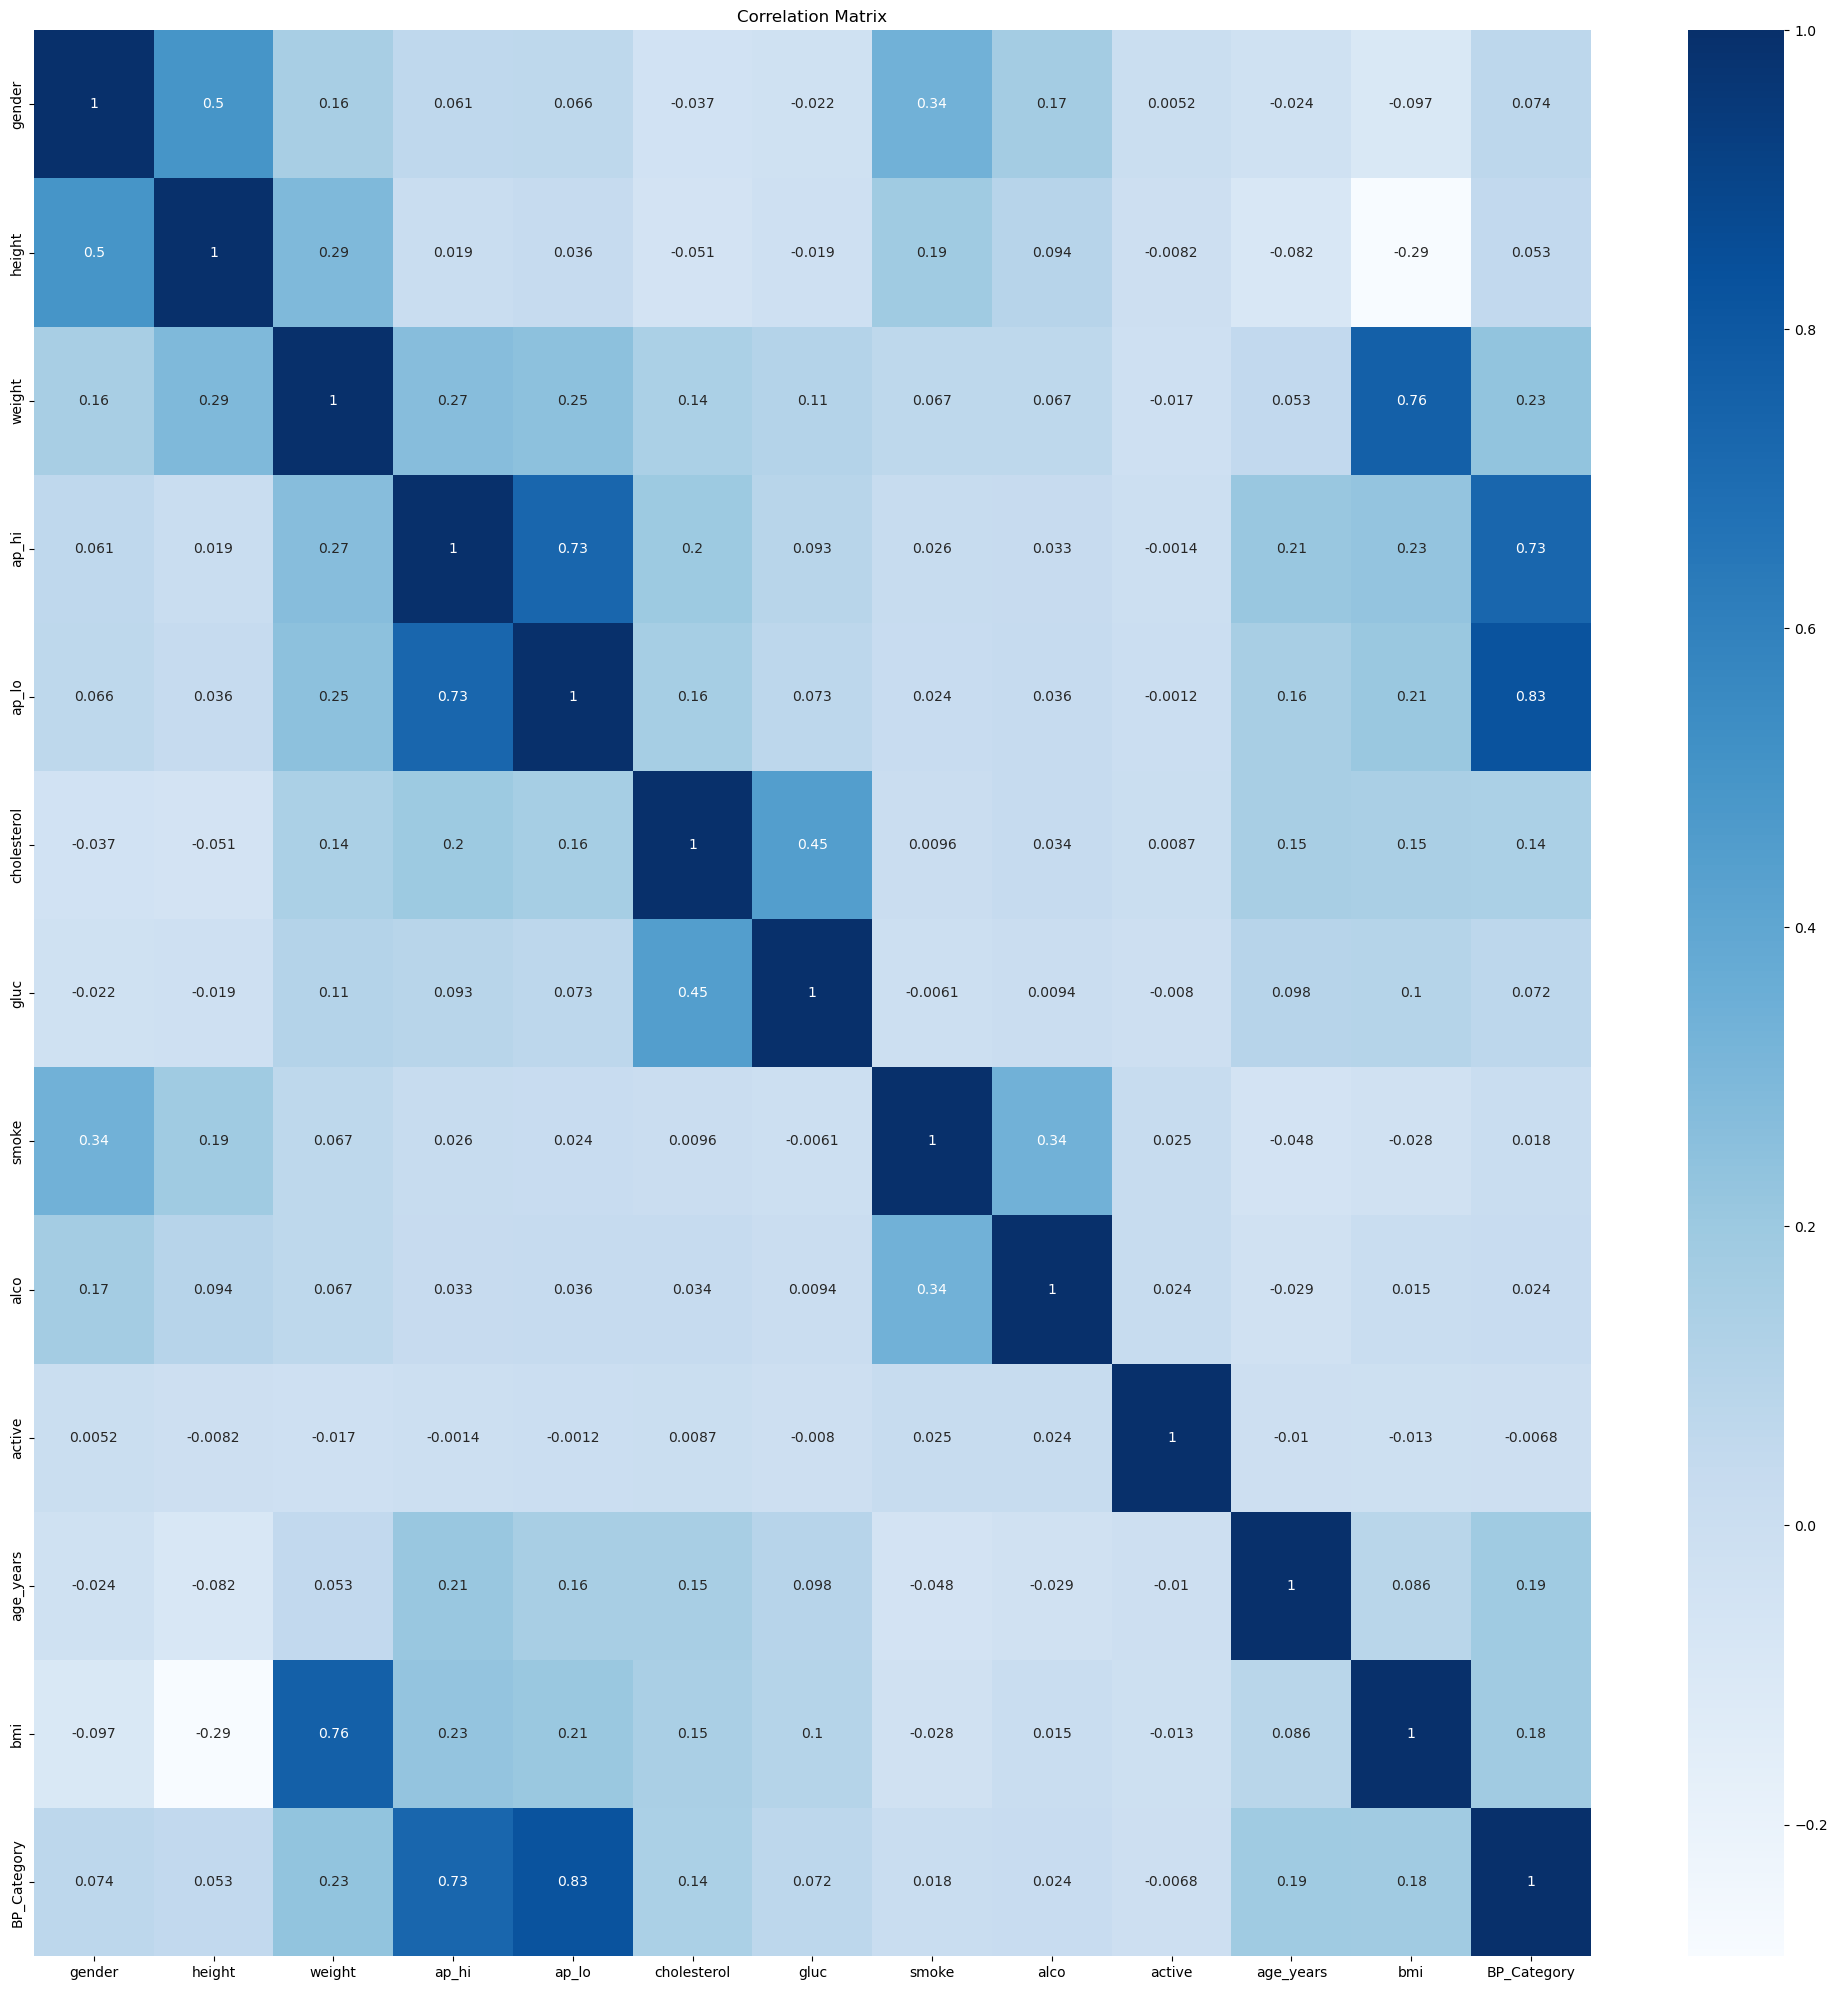

In [393]:
plt.figure(figsize=(20, 20))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [394]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,BP_Category
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,52.823635,27.510513,1.912059
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,6.769909,6.026497,0.907570
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,29.000000,3.471784,0.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,48.000000,23.875115,2.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,53.000000,26.346494,2.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,58.000000,30.116213,2.000000
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,64.000000,298.666667,3.000000


In [395]:
# 1 -> Female, 2-> Male
print(df['gender'].value_counts()[1])
print(df['gender'].value_counts()[2])

44427
23778


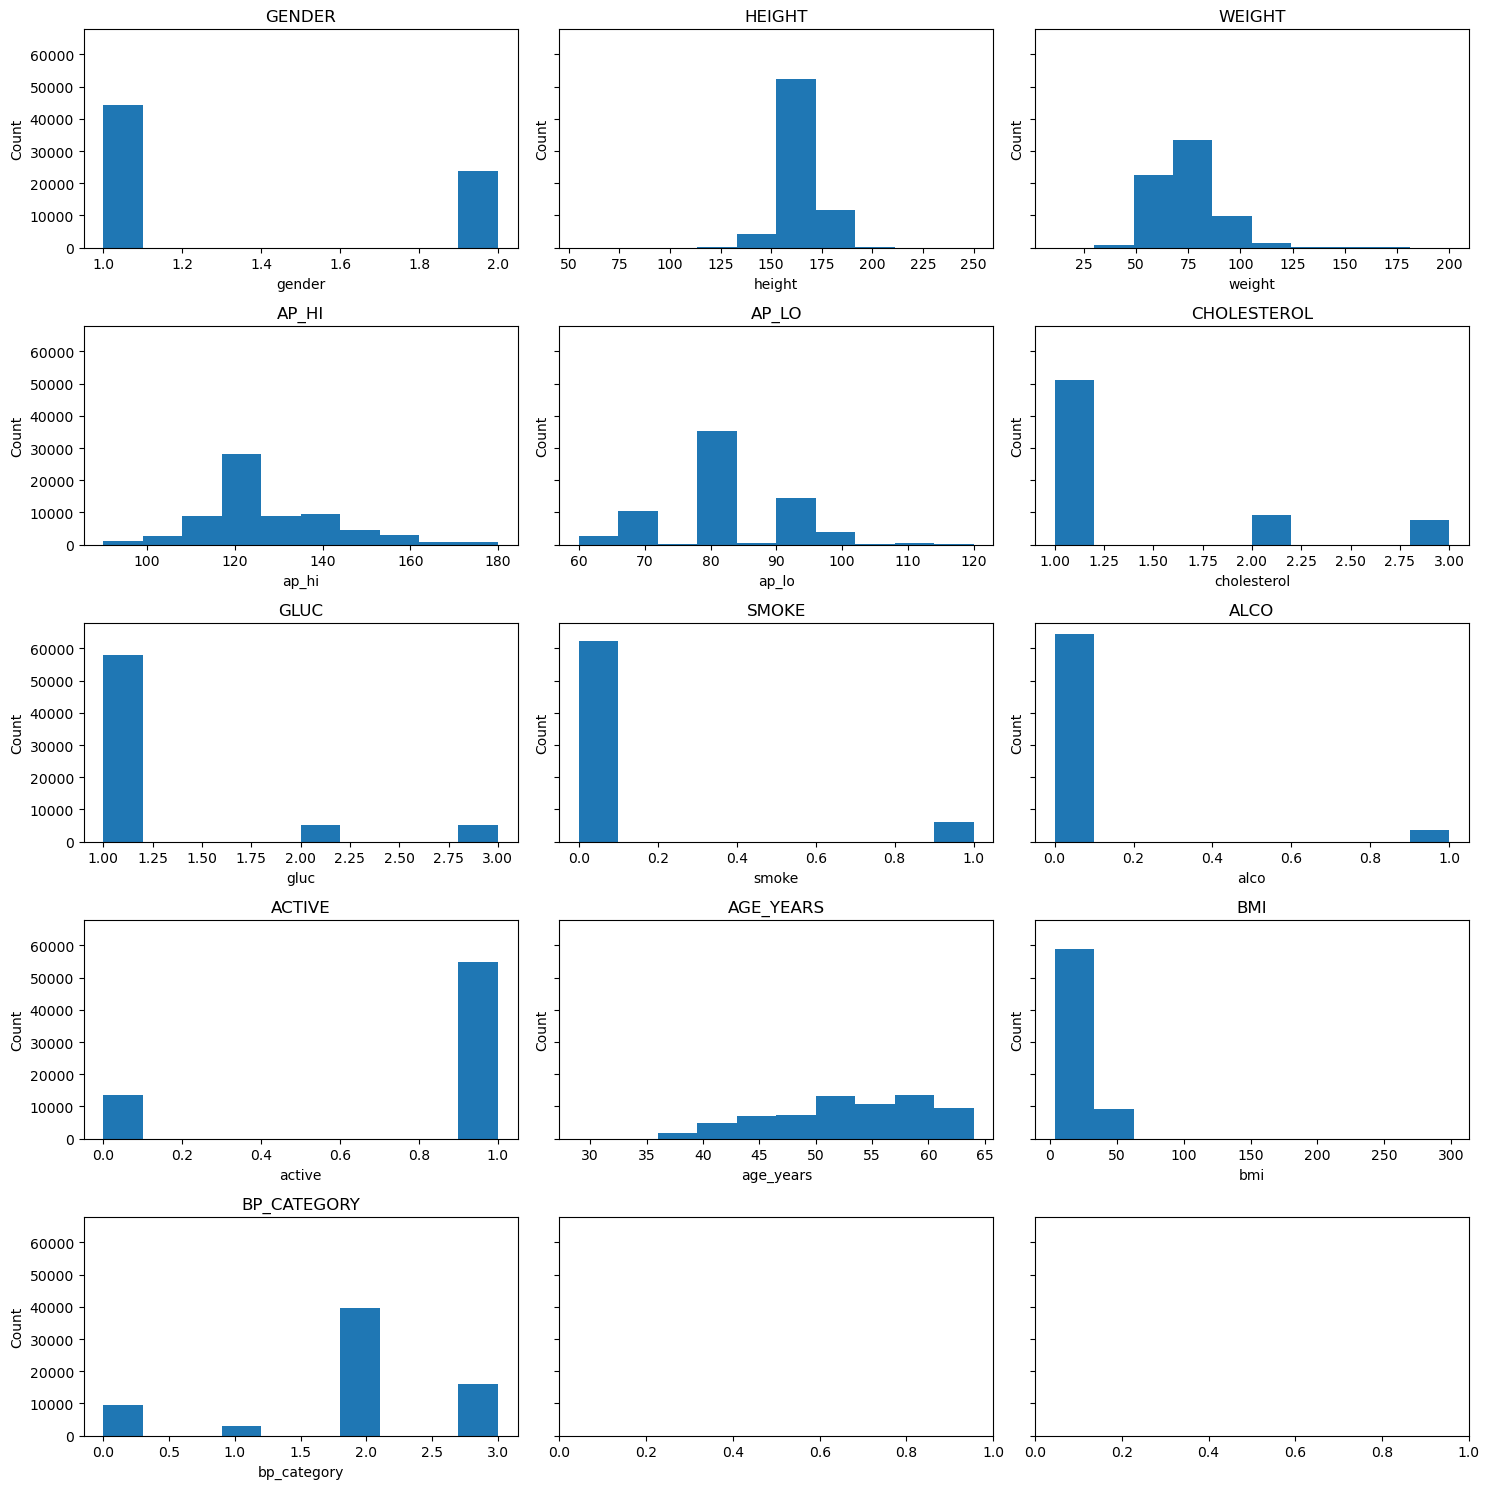

In [396]:
# Histograms
fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharey=True)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(x=df[col], bins=10)
    ax.set_title(col.upper())
    ax.set_xlabel(col.casefold())
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

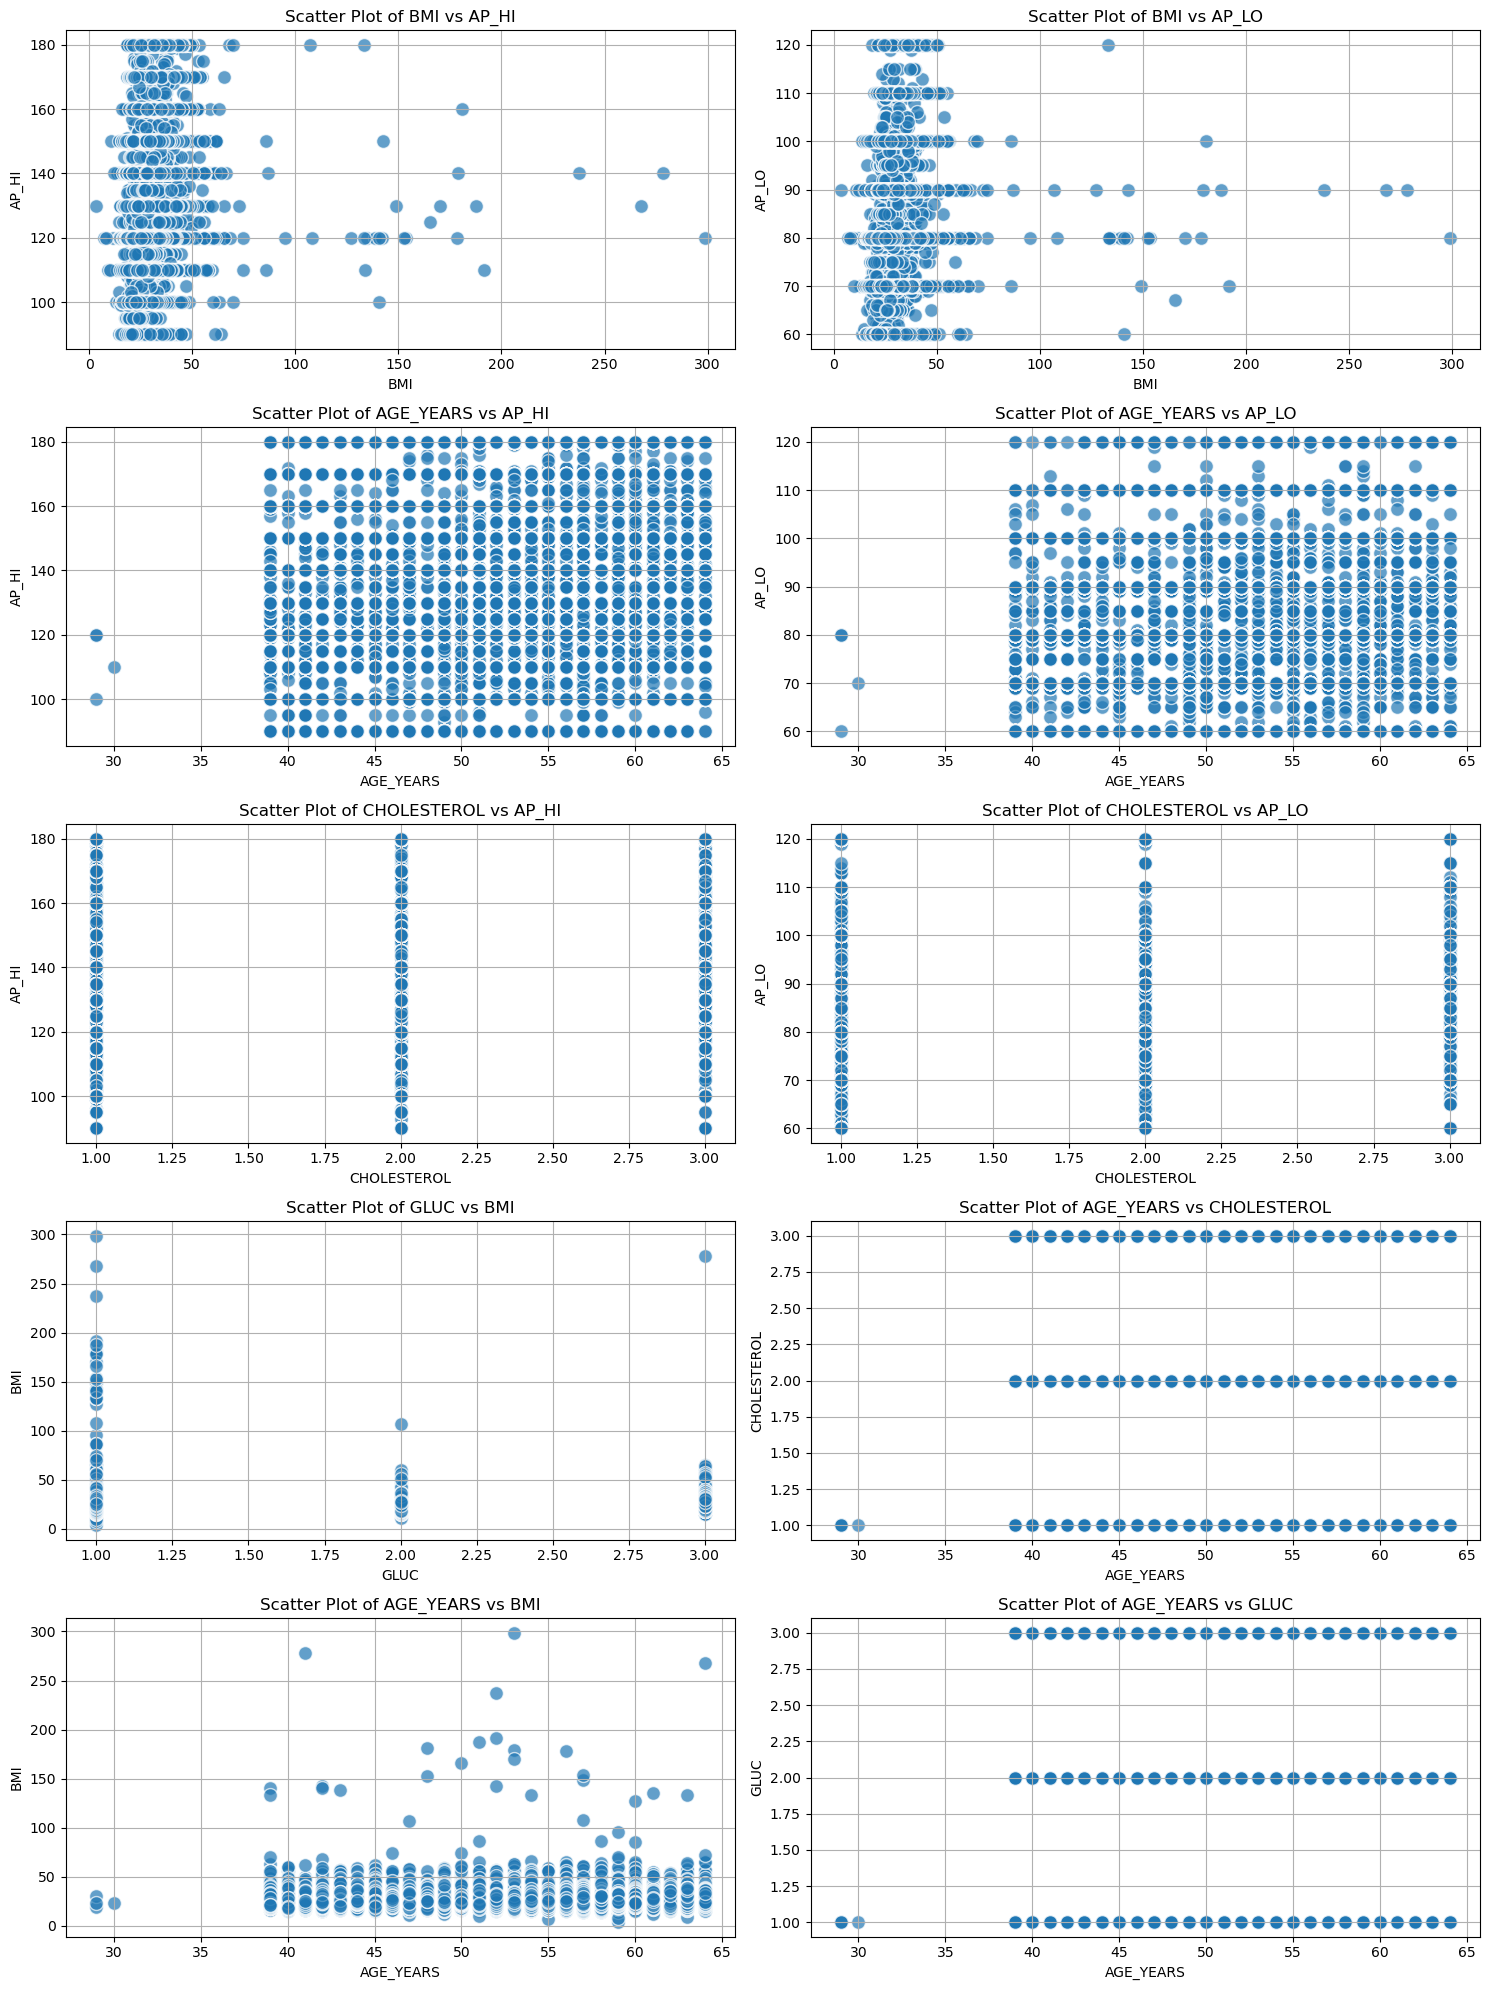

In [397]:
feature_pairs = [
    ('bmi', 'ap_hi'),
    ('bmi', 'ap_lo'),
    ('age_years', 'ap_hi'),
    ('age_years', 'ap_lo'),
    ('cholesterol', 'ap_hi'),
    ('cholesterol', 'ap_lo'),
    ('gluc', 'bmi'),
    ('age_years', 'cholesterol'),
    ('age_years', 'bmi'),
    ('age_years', 'gluc')
]

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

# Create the scatter plot
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[i]
    ax.scatter(df[x_feature], df[y_feature], alpha=0.7, edgecolors='w', s=100)
    ax.set_title(f'Scatter Plot of {x_feature.upper()} vs {y_feature.upper()}')
    ax.set_xlabel(x_feature.upper())
    ax.set_ylabel(y_feature.upper())
    ax.grid(True)
    
# Show the plot
plt.tight_layout()
plt.show()

## Collective Graphs of Male and Female

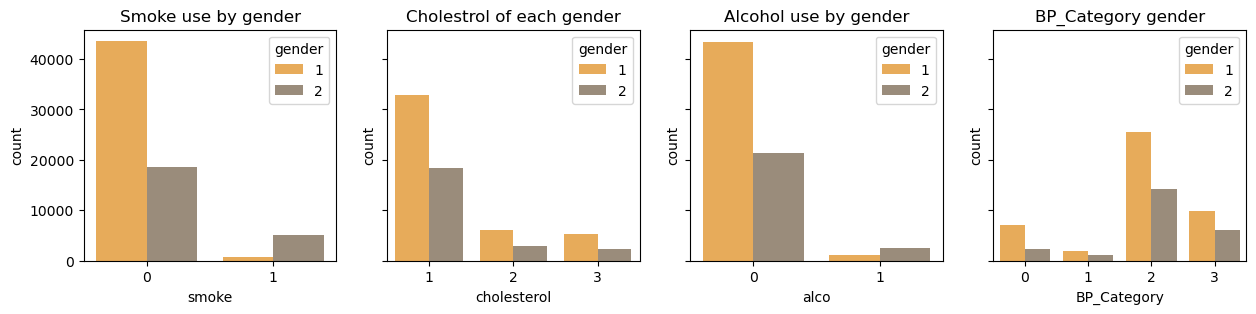

In [398]:
colors = ['#FFAE42', '#9F8C76']
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)

sns.countplot(ax=axes[0], x=df.smoke, hue=df.gender, palette=colors)
axes[0].set_title('Smoke use by gender')

sns.countplot(ax=axes[1], x=df.cholesterol, hue=df.gender, palette=colors)
axes[1].set_title('Cholestrol of each gender')

sns.countplot(ax=axes[2], x=df.alco, hue=df.gender, palette=colors)
axes[2].set_title('Alcohol use by gender')

sns.countplot(ax=axes[3], x=df.BP_Category, hue=df.gender, palette=colors)
axes[3].set_title('BP_Category gender')

plt.show()

## Feature Engineering

In [399]:
## New Feature of ratio of Systolic and Diastolic

df['Ratio of Sys/Dia'] = df['ap_hi'] / df['ap_lo']

In [400]:
df['BMI_ap_hi'] = df['bmi'] * df['ap_hi']
df['BMI_ap_lo'] = df['bmi'] * df['ap_lo']

In [401]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,BP_Category,Ratio of Sys/Dia,BMI_ap_hi,BMI_ap_lo
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,2,1.375000,2416.383220,1757.369615
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,3,1.555556,4889.875082,3143.491124
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,2,1.857143,3056.014692,1645.546373
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,3,1.500000,4306.571899,2871.047932
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,0,1.666667,2301.117686,1380.670611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,52,26.927438,2,1.500000,3231.292517,2154.195011
68201,1,158,126.0,140,90,2,2,0,0,1,61,50.472681,3,1.555556,7066.175292,4542.541259
68202,2,183,105.0,180,90,3,1,0,1,0,52,31.353579,3,2.000000,5643.644182,2821.822091
68203,1,163,72.0,135,80,1,2,0,0,0,61,27.099251,2,1.687500,3658.398886,2167.940081


# Training Model

In [402]:
df_encoded = df.drop(['active', 'smoke', 'alco', 'gluc', 'cholesterol', 'age_years', 'height', 'weight', 'gender'], axis=1)

df_encoded

,ap_hi,ap_lo,bmi,BP_Category,Ratio of Sys/Dia,BMI_ap_hi,BMI_ap_lo
0,110,80,21.967120,2,1.375000,2416.383220,1757.369615
1,140,90,34.927679,3,1.555556,4889.875082,3143.491124
2,130,70,23.507805,2,1.857143,3056.014692,1645.546373
3,150,100,28.710479,3,1.500000,4306.571899,2871.047932
4,100,60,23.011177,0,1.666667,2301.117686,1380.670611
...,...,...,...,...,...,...,...
68200,120,80,26.927438,2,1.500000,3231.292517,2154.195011
68201,140,90,50.472681,3,1.555556,7066.175292,4542.541259
68202,180,90,31.353579,3,2.000000,5643.644182,2821.822091
68203,135,80,27.099251,2,1.687500,3658.398886,2167.940081


### To see correlation heatmap once again

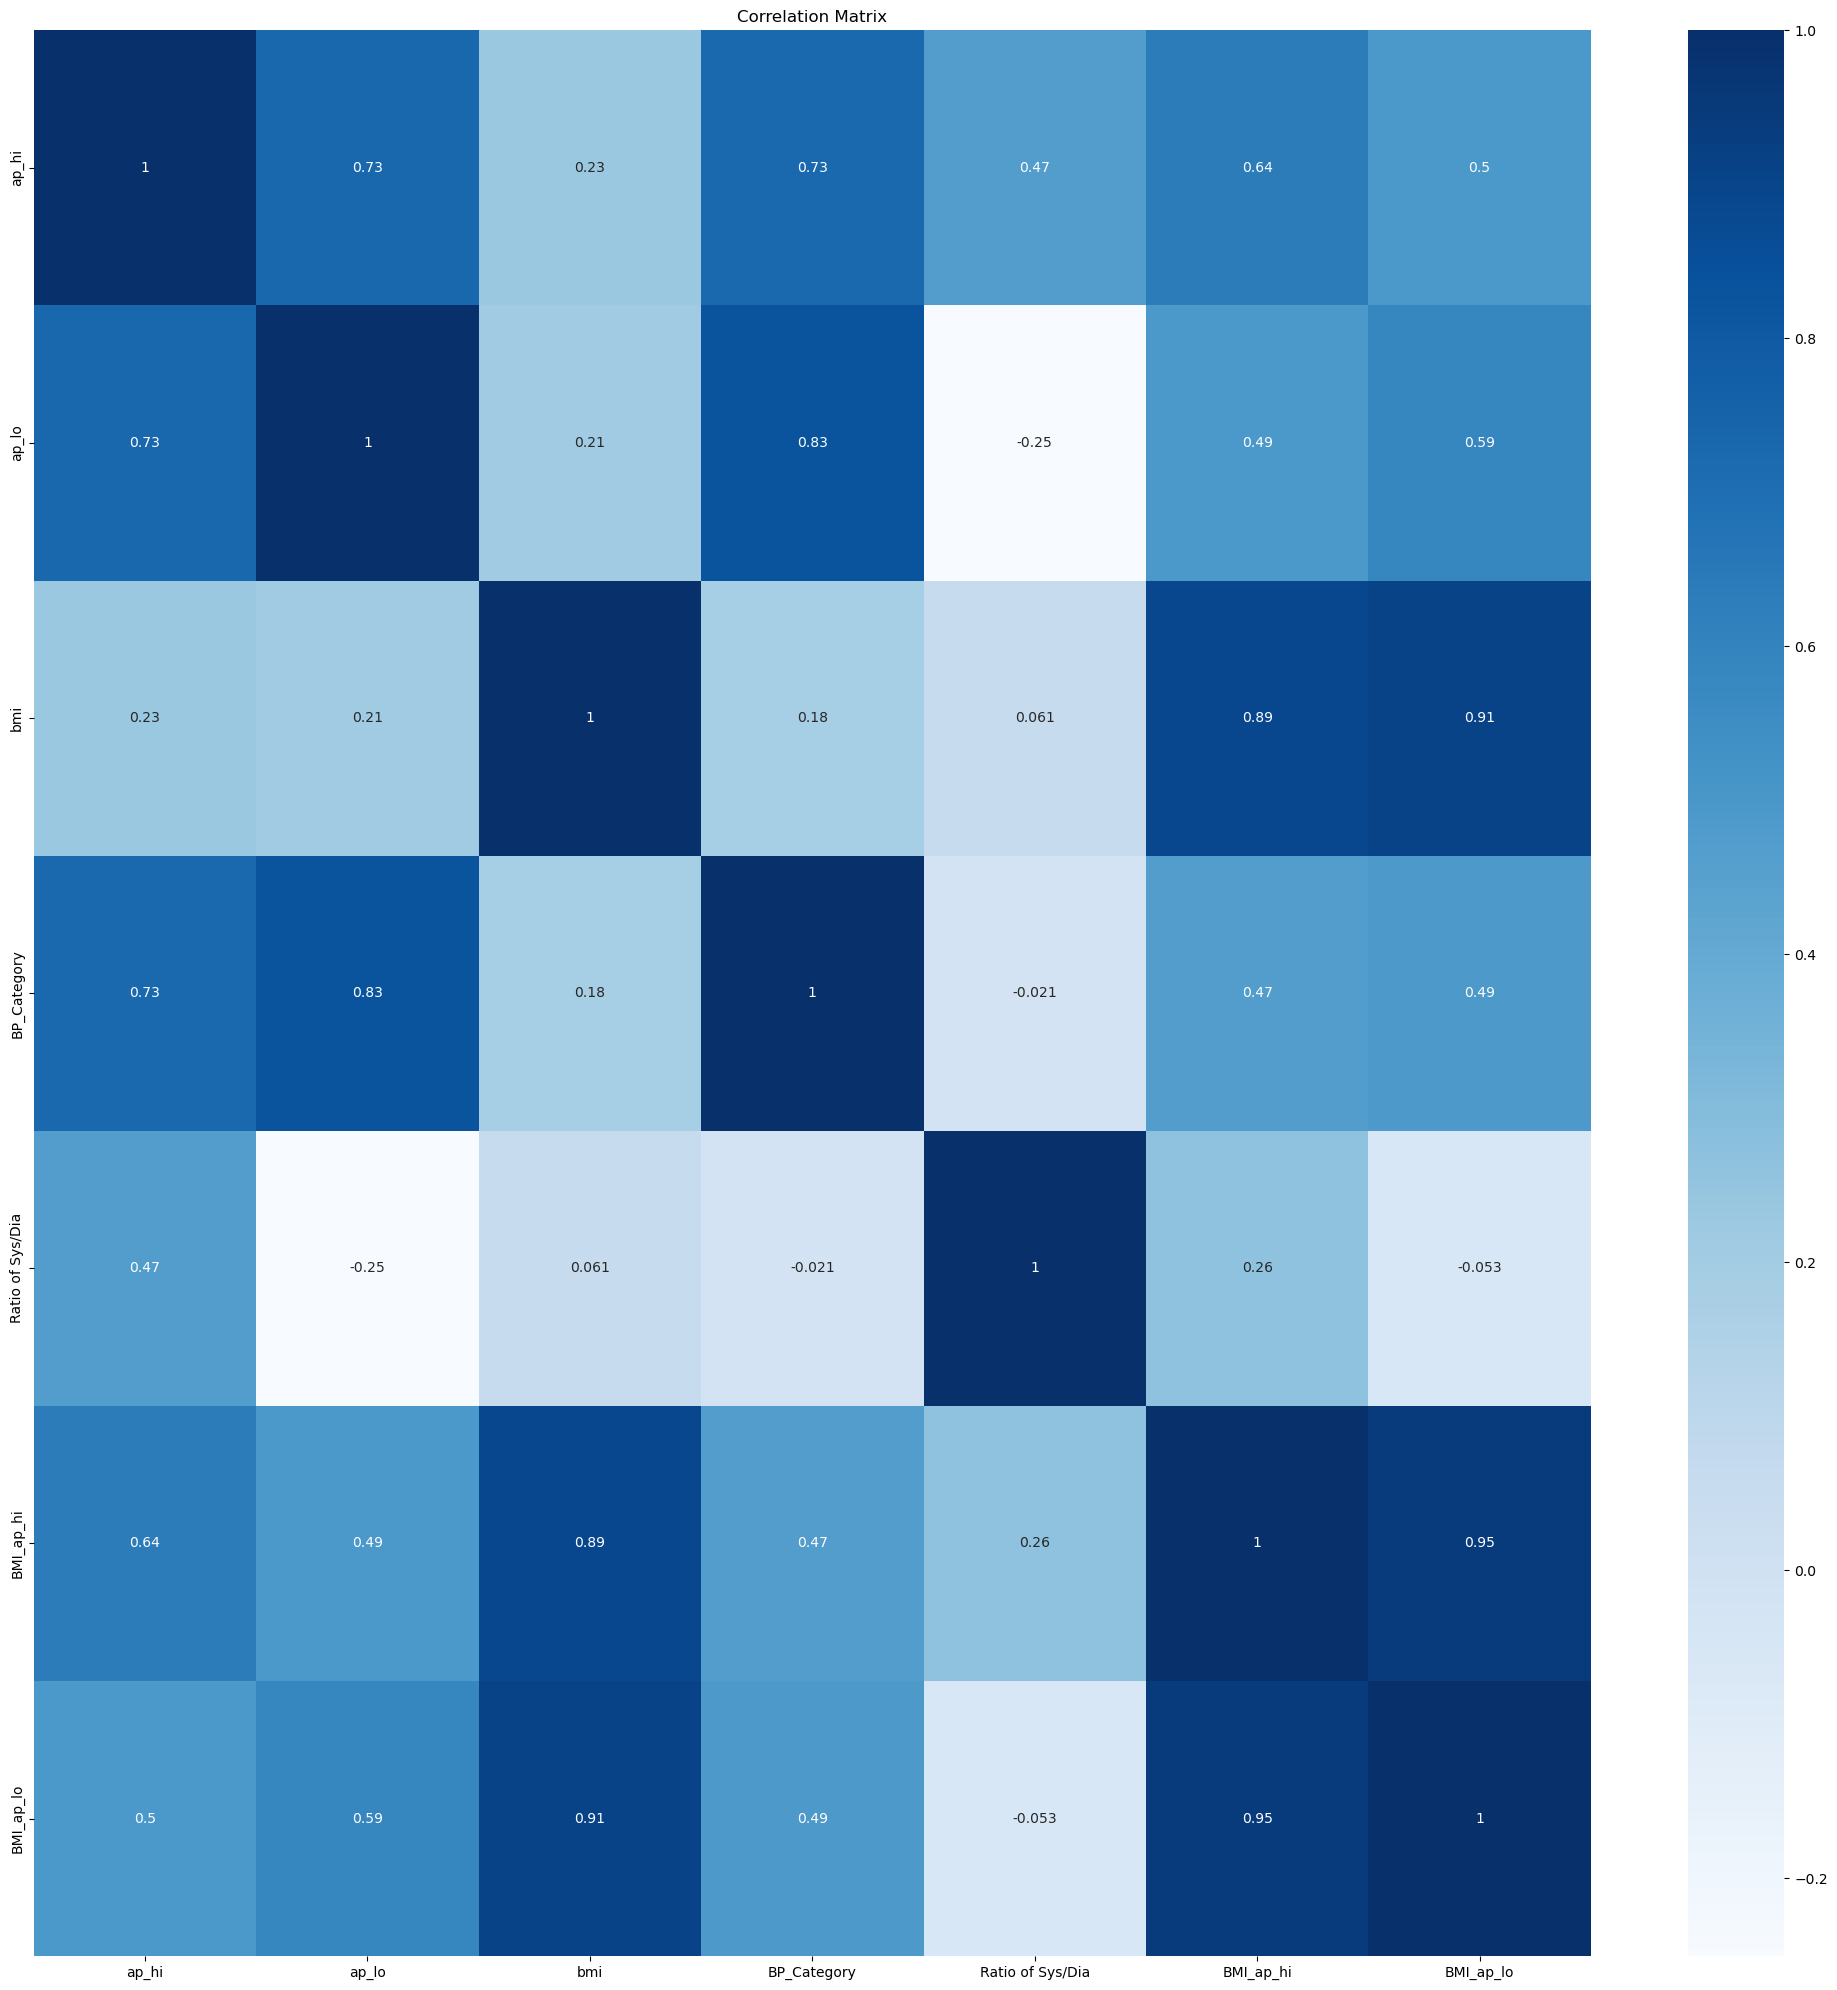

In [403]:
plt.figure(figsize=(20, 20))
correlation=df_encoded.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [404]:
X = np.array(df_encoded)
X.shape

(68205, 7)

In [405]:
num_classes = len(np.unique(y1))
y1 = to_categorical(y1, num_classes)

y1.shape

(68205, 2)

In [406]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [407]:
# Split into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y1, test_size=0.2, random_state=1)

# Split train+val into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

opt = keras.optimizers.Adam()

In [408]:
model = Sequential()
input_layer = Input(shape=(7,))
model.add(input_layer)

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))    
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [409]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5009 - loss: 23.5256 - val_accuracy: 0.5133 - val_loss: 3.8586
Epoch 2/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5063 - loss: 3.7423 - val_accuracy: 0.5133 - val_loss: 3.3306
Epoch 3/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5079 - loss: 3.2005 - val_accuracy: 0.5133 - val_loss: 2.7821
Epoch 4/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5070 - loss: 2.6529 - val_accuracy: 0.5133 - val_loss: 2.2630
Epoch 5/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5097 - loss: 2.1462 - val_accuracy: 0.5133 - val_loss: 1.8059
Epoch 6/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5031 - loss: 1.7093 - val_accuracy: 0.5133 - val_loss: 1.4341
Epoch 7/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5039 - loss: 1.3586 - val_accuracy: 0.5133 - val_loss: 1.1511
Epoch 8/20
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5141 - loss: 1.0976 - val_accuracy: 0

In [410]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.6472 - loss: 0.6600
Test accuracy: 0.648632824420929


In [411]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f'Training loss: {train_loss*100}')
print(f'Training accuracy: {train_acc*100}')

1279/1279 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.6385 - loss: 0.6622
Training loss: 66.11546874046326
Training accuracy: 64.12042379379272


In [412]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss*100}')
print(f'Validation accuracy: {val_acc*100}')

427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.6437 - loss: 0.6575
Validation loss: 65.81305861473083
Validation accuracy: 64.3354594707489


### Using Gradient Boosting

In [413]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [414]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [415]:
X_train_val, X_test, y2_train_val, y2_test = train_test_split(X, y2, test_size=0.2, random_state=1)
X_train, X_val, y2_train, y2_val = train_test_split(X_train_val, y2_train_val, test_size=0.25, random_state=1)

In [416]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=1)

In [417]:
gbc.fit(X_train, y2_train)

GradientBoostingClassifier(max_depth=6, random_state=1)

In [418]:
y_train_pred = gbc.predict(X_train)
train_accuracy = accuracy_score(y2_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy}')

Train Accuracy: 0.7294675365931139


In [419]:
y_val_pred = gbc.predict(X_val)
val_accuracy = accuracy_score(y2_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.7067663661021919


In [420]:
y_test_pred = gbc.predict(X_test)
test_accuracy = accuracy_score(y2_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.7108716369767613


In [425]:
print("Classification Report:\n", classification_report(y2_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.72      0.67      6773
           1       0.68      0.59      0.63      6868

    accuracy                           0.65     13641
   macro avg       0.66      0.65      0.65     13641
weighted avg       0.66      0.65      0.65     13641



In [426]:
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_test_pred))

Confusion Matrix:
 [[4880 1893]
 [2833 4035]]


### Using Random Forest Classifier

In [427]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

rf_model.fit(X_train, y2_train)

RandomForestClassifier(random_state=1)

In [428]:
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y2_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.6511985924785573


In [429]:
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y2_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.6535444615497398
